In [7]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

1.  make line graphs, bar charts, Scatter plots
2.  when to use each bases on whether we have Numerical data and catergorical data


## Lecture 7 ##

## Census ##

1. Review Numerical data and catergorical data
2. Recall last time we looked at census data

3. This table has alot of information
4. Lets look at at certain columns! 
5. Sex, age, Population in 2010 and estimation of population in 2014




In [8]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


1. Here is the code!

2. Question: is Sex a numerical data type or a catergorical data type? What about age is  a numerical data type or a catergorical data type?


3. Answer: Sex is a catergorical type since it groups objects into different classes and is not ordered even though
the sex is representedby a number

4. Answer: While age is a numerical type since it ordered, I.e a 1 year old baby is younger then a 75 year old 

In [9]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial # Remeber select is a method: Table().select(column_names1,...,column_names1) - > Table with only (column_names1,...,column_names1)

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [10]:
1. let relabel the columns again 

SyntaxError: invalid syntax (<ipython-input-10-e567bf0c21ff>, line 1)

In [11]:
# Make things easier to read
simple = partial.relabeled(2, '2010').relabeled(3, '2014')
simple #recall that relabeled is a method: table().relabeled('orginal column name','newcolumnname')

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [ ]:
# Sort by age
simple.sort('AGE')

In [ ]:
# Sort by age (another way)
simple.sort('AGE', descending=True)

## Line Plots ##

1. We will learn how to produce line plots and what they represent
2. we will review some code that we saw lasst time

In [12]:
# Remove the age totals
no_999 = simple.where('AGE', are.below(999)) # here we are removing all the numbers that contain all ages 
                                             # standard applicaiton of where 

In [13]:
# Remove male and female (keep only combined)
everyone = no_999.where('SEX', 0).drop('SEX') # now we only want the total populations for each age
                                              # so we apply the method where to find this and we drop the column sez

In [14]:
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


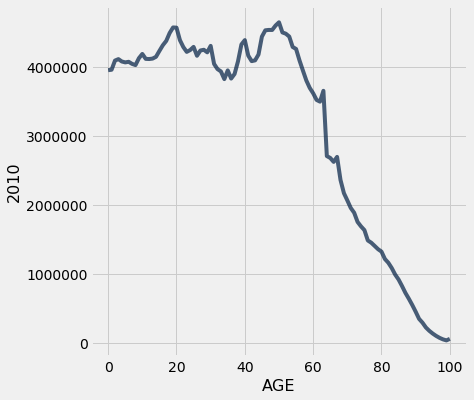

In [15]:
everyone.plot('AGE', '2010') # to print out a line graph we have the plot method!
# table().plot('Colulmn1'=x,'Colulmn2'=y)


# Alright. We use a line plot for sequential data.

# For example when x-axis has an order or

#when There's only one y value for each x value.

# 0r when  x-axis has an order

# The common cases where we use a line plot will be the x-axis is time, like a year, a day,



In [ ]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

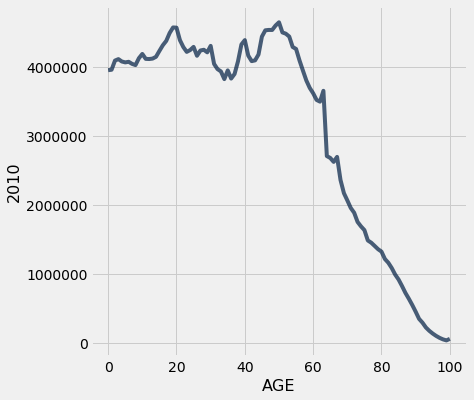

In [16]:
# US Population  <--- Just add a comment

everyone.plot('AGE', '2010')

US Population


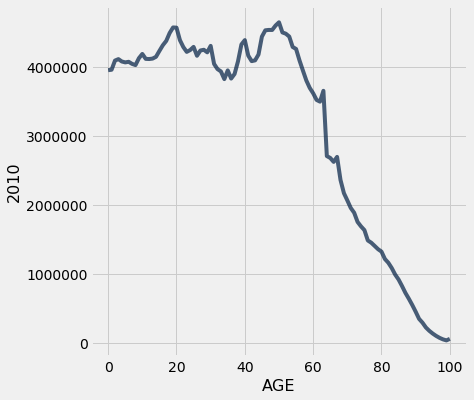

In [17]:
everyone.plot('AGE', '2010')
print('US Population')  # <--- Print out what it is

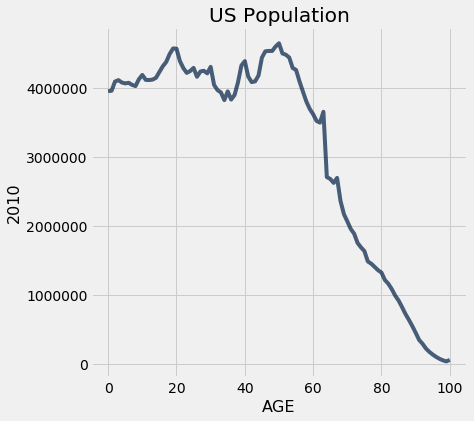

In [18]:
everyone.plot('AGE', '2010')
plots.title('US Population');    # <--- OPTIONAL; not needed for Data 8

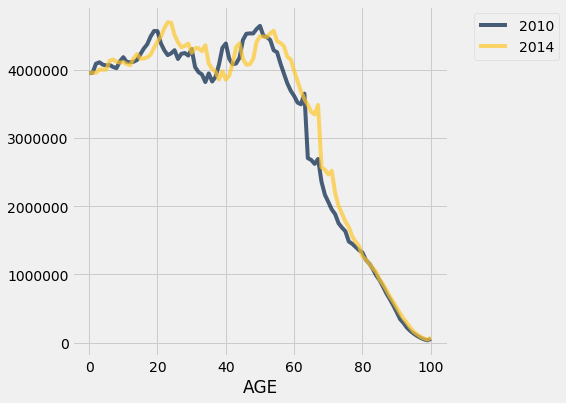

In [19]:
# Age distribution for two different years
everyone.plot('AGE')

## Males and Females in 2014 ##

In [20]:
# before we look at scatter plots 
# to do so lets further make a table comparing females vs male population


# Let's compare male and female counts per age
males = no_999.where('SEX', 1).drop('SEX') # herere we are useing the total population for all ages then finding only males
females = no_999.where('SEX', 2).drop('SEX') # herere we are useing the total population for all ages then finding only females

In [22]:
pop_2014 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2014'),
    'Females', females.column('2014')

# Lets make one table with this information
# here the with_columns method('column name' array of information) 


# why do we have an error here?


pop_2014

SyntaxError: invalid syntax (<ipython-input-22-d84928b1b03d>, line 13)

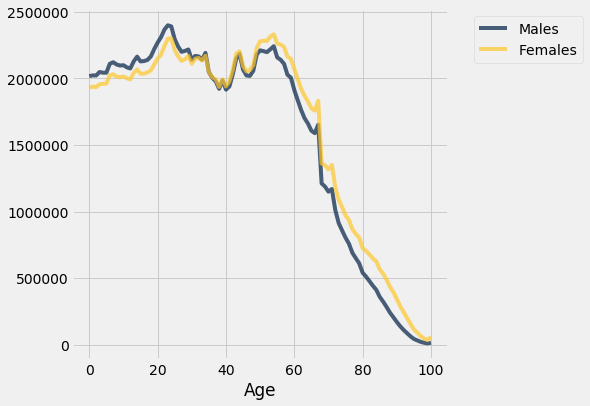

In [23]:
pop_2014.plot('Age') # now we can plot mutiple graphs by plot
# table.plot(x-axis column) - all other columns are represent as y-values and different curves

In [33]:
# Calculate the percent female for each age
total = pop_2014.column('Males') + pop_2014.column('Females')
pct_female = pop_2014.column('Females') / total * 100
pct_female

array([48.89366444, 48.93512897, 48.89796583, 48.85091594, 48.95654945,
       48.9752945 , 48.95625723, 48.91092922, 48.89890191, 48.93212091,
       48.9734048 , 48.99969062, 48.99606517, 48.95633512, 48.86619665,
       48.88170995, 48.86445062, 48.88986227, 48.76308397, 48.668799  ,
       48.63932932, 48.5330796 , 48.66269094, 48.92327135, 49.03933504,
       49.08996242, 49.16509171, 49.21162965, 49.28169646, 49.44899983,
       49.65375766, 49.75983547, 49.86565039, 49.93824999, 49.74770193,
       49.99251351, 50.05521355, 50.20280862, 50.18189092, 50.10049432,
       50.31587643, 50.47966604, 50.40624483, 50.42907187, 50.23118137,
       50.32445422, 50.37830234, 50.53327291, 50.51106084, 50.55818402,
       50.75941276, 50.86725098, 50.93664868, 51.06392595, 50.97417608,
       51.18857886, 51.29709649, 51.45934869, 51.62031101, 51.70400468,
       51.97408419, 52.08985538, 52.15439053, 52.36152155, 52.36785492,
       52.49779211, 52.53185996, 52.56760719, 52.90700545, 53.15

In [25]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

array([48.894, 48.935, 48.898, 48.851, 48.957, 48.975, 48.956, 48.911,
       48.899, 48.932, 48.973, 49.   , 48.996, 48.956, 48.866, 48.882,
       48.864, 48.89 , 48.763, 48.669, 48.639, 48.533, 48.663, 48.923,
       49.039, 49.09 , 49.165, 49.212, 49.282, 49.449, 49.654, 49.76 ,
       49.866, 49.938, 49.748, 49.993, 50.055, 50.203, 50.182, 50.1  ,
       50.316, 50.48 , 50.406, 50.429, 50.231, 50.324, 50.378, 50.533,
       50.511, 50.558, 50.759, 50.867, 50.937, 51.064, 50.974, 51.189,
       51.297, 51.459, 51.62 , 51.704, 51.974, 52.09 , 52.154, 52.362,
       52.368, 52.498, 52.532, 52.568, 52.907, 53.154, 53.405, 53.592,
       53.929, 54.4  , 54.642, 54.728, 55.249, 55.702, 56.179, 56.816,
       57.278, 57.97 , 58.654, 59.426, 60.31 , 61.159, 62.261, 63.24 ,
       64.423, 65.71 , 66.783, 67.659, 69.009, 69.972, 71.585, 72.745,
       74.225, 75.542, 77.322, 78.395, 80.984])

In [34]:
# Add female percent to our table
pop_2014 = pop_2014.with_column('Percent female', pct_female)
pop_2014

Age,Males,Females,Percent female
0,2017857,1930493,48.8937
1,2023253,1938870,48.9351
2,2022502,1935270,48.898
3,2048618,1956572,48.8509
4,2043498,1959950,48.9565
5,2043467,1961391,48.9753
6,2110328,2024024,48.9563
7,2122240,2031760,48.9109
8,2105122,2014402,48.8989
9,2097272,2009560,48.9321


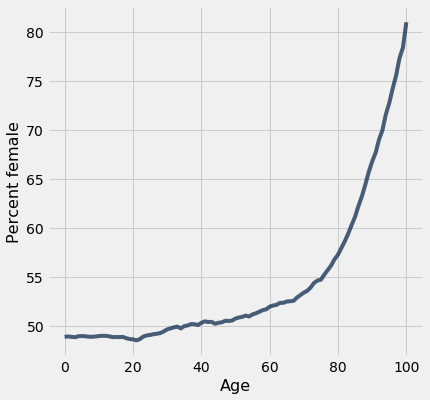

In [35]:
pop_2014.plot('Age', 'Percent female') # now we plot our data but if we look at the y-values we notice thy dont start at 0
# perceptionally this changes we the data ppear to be , lets switch scale

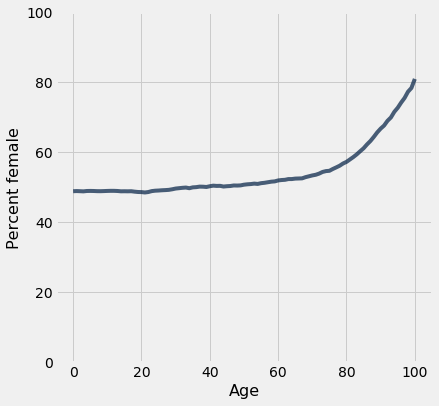

In [36]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
pop_2014.plot('Age', 'Percent female')
plots.ylim(0, 100);  # Optional for Data 8

## Scatter Plots ##

In [29]:
#Scatter plots for non-sequential data
#that's particularly important, um, and scatterplot's particularly useful
#when I'm looking for an association, where I think there might be some kind
#of a loose association. 
# A scatter plot is appropriate when, um, again you have two numerical variables
#and you're interested in the association between them 

# For example  actors as There's no real ordering of the actors


#  presumably the larger the gross, the bigger the hit the movie was, um,
#and so, um, uh, high values of this means they were tended to be in, um, very very big movies



#Let's look at, maybe, comparing, um, uh,for each actor, um, how the number of movies you're in
#affects the total gross of the movies that you're in and a good way to do that
#is using something called a scatter plot 

# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


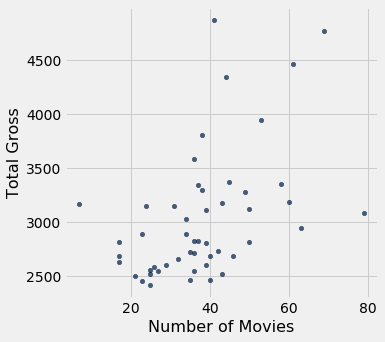

In [37]:
actors.scatter('Number of Movies', 'Total Gross')
# on the x-axis you hav enumber of movies on y -axis you have total gorss

#Here's the important part.
#Each point represents a single actor, a single row
#in that table. Okay. So, for instance here is a point, an
#actor, who was in close to 40ish movies and the total gross of all the movies over 3 billion

# Now, it kind of makes sense you can kind of see what looks like a positive
#association, here, which makes sense if you think about it.
#Scatter plots can be a helpful way to look for association
#and this is positive association. Kind of makes sense. 
#The more movies you're in,the more the total grossing is because each movie you're in adds to that total. 

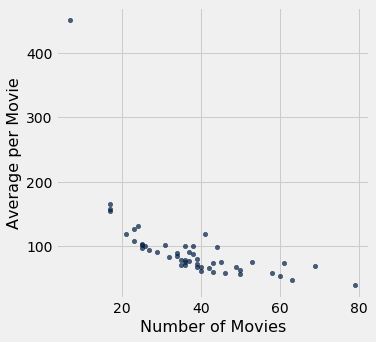

In [31]:
actors.scatter('Number of Movies', 'Average per Movie')

In [38]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


## Bar Charts ##

In [39]:
# bar charts are useful,when you have categorical data. 

#Well, this is the top movies that up to 2017
#and, here, you can see the movies, where I'm rating them by the amount they
#grossed. So, the top movie of all time by that
#measure was "Gone with the Wind." I'm not saying it's the best movie, just
#the one that's brought in the most money 


# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [40]:
top10_adjusted = top_movies.take(np.arange(10)) # lets look at the the top 10
top10_adjusted                                  # table.take(input array that contains row position)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [41]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


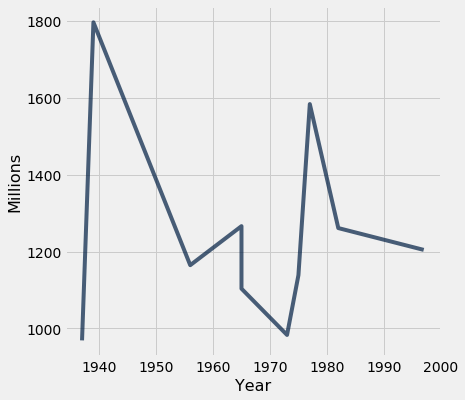

In [42]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

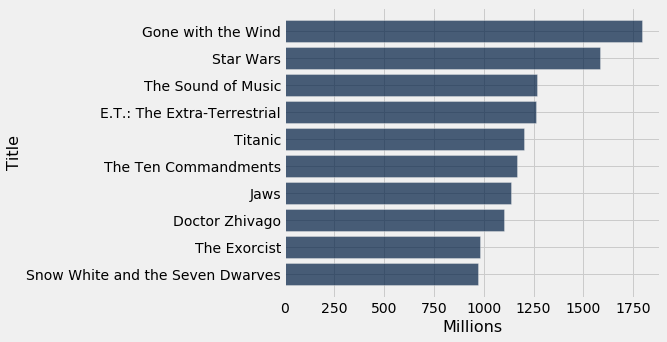

In [43]:
top10_adjusted.barh('Title', 'Millions')

# appropriate is to show a bar chart and a bar
#chadata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAApsAAAFWCAYAAAAmDFaTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3X1czff/P/DH6UoRHcSpVJJaQpIoTc3FRuYimiy5mgmTuVh87GOuNpcNmYtCNoyJuRgfi7ksUVkhNTFqkcRcpSlqKnX6/eHX++voUqfTOR2P++12buu83q/36/V8HrY9e73e7/MWZWdnl4CIiIiISAE0lB0AEREREakvFptEREREpDAsNomIiIhIYVhsEhEREZHCsNgkIiIiIoVhsUlERERECsNik4iIiIgUhsUmERERESkMi00iojeUmpqq7BBqBfNQLcxDdahDDoDq5MFik4iIiIgUhsUmERERESkMi00iIiIiUhgWm0RERESkMCw2iYiIiEhhWGwSERERkcKw2CQiIiIihWGxSUREREQKw2KTiIiIiBSGxSYRERERKYyWsgMgordPXOJ1ZYcgl5ycHGTlFik7DLkxD9XCPFSHOuQAVC+PVhJDmJm0UGgcLDaJqM6t2fo/ZYcgl7y8PDRq1EjZYciNeagW5qE61CEHoHp5+Pt6KrzY5DY6ERERESkMi00iIiIiUhgWm0RERESkMCw2iYiIiEhhWGwSvcLOzg5BQUGV9gkICICLi0utzOfn5wdvb+9aGas21FY8Li4uCAgIqIWIiIiovmOxSXJ59OgRvvrqK3Tp0gUSiQRWVlbo168fNm/ejNzcXGWH98YiIyPh6+srvBeLxfj111/lHvf27dsQi8VITEyUe6yqhIeHQywW4++//5Zp79y5M8zNzVFcXCy0/fvvv2jRogV27twJAPj222+xefNmhcdIRERvD371EdXY7du30b9/fzRu3Bjz5s1Dhw4dIJVKcePGDezZswfNmjXD8OHDlR3mGzE0NFR2CHJzcXGBtrY2YmJihFXKu3fv4t69exCLxUhKSoKDgwMA4Pz583jx4gXc3NwAAAYGBkqLm4iI1BNXNqnGZs2aBQ0NDURGRmLYsGFo164d2rdvDw8PD+zevRteXl5C3zt37mDUqFEwNTWFqakpRo8eLbPyVro1feDAAXTu3BmmpqYYOXIksrKyZOYMDQ2Fs7MzJBIJHB0dsWHDBkil0nLjy83NhaGhIeLj44W29u3bw8nJSXgfGRkJExMTvHjxAoDsNrqdnR0A4JNPPoFYLBbel6oq1lfZ29sDAHr37g2xWIyBAwfKHN+0aRNsbW3RunVrTJkyBf/++69wrKSkBOvWrUPnzp1hZGSEd999F3v37q1wrkaNGqFLly6Ijo4W2qKjo+Ho6IiePXuWaTczM4OFhQWAstvoAwcOxKxZs7B48WJYWlrCysoK8+fPl/nMMzMz4ePjAyMjI3Ts2FFYJSUiIgJYbFINPXnyBBEREZgwYUKFXxgrEokAvCyWRo0ahczMTISFheHw4cN48OABRo0ahZKSEqF/RkYGDh48iNDQUBw8eBBJSUlYsmSJcHzHjh1YsmQJ5s6di/Pnz2Pp0qVYt24dtmzZUu78+vr6sLe3F4qrmzdv4unTp8jIyMCDBw8AADExMXBycoK2tnaZ8yMjIwEA69evR0pKivC+OrG+7vTp0wBeFqgpKSkIDQ0VjsXGxuL69es4dOgQfvzxRxw5cgQhISHC8aVLl2Lnzp0IDAxEXFwc/P394e/vjxMnTlQ4n5ubW5miskePHnB1dS3T/t5771U4DgDs378fmpqaOHnyJFatWoVNmzbh4MGDwvEpU6bg1q1bOHToEHbt2oU9e/YgIyOj0jGJiOjtwW10qpGbN2+ipKQEVlZWMu3t27dHTk4OAODjjz/GmjVrcObMGVy9ehWJiYlo3bo1AGDLli1wcHDA2bNn0atXLwBAUVERNm7cKGzljhs3Drt27RLGXrVqFRYtWoQhQ4YAACwsLHDr1i1s3boVkyZNKjfO0uLK398fMTEx6N69O/7991/ExMTAy8sLMTEx6Nu3b7nnlm6pGxgYQCKRyByrKtbXNW/eHADQrFmzMmM1btwY3333HbS0tGBjY4OhQ4fi7NmzmDlzJvLy8rBhwwYcPHgQ7777rpD3pUuXsGXLFri7u5c7n5ubGwIDA5GRkQFzc3NER0cjODgYrVq1wrx581BUVIT8/HwkJiZiwoQJFcYNADY2Npg3bx4AwMrKCjt27MDZs2fh5eWFGzdu4NSpUzh+/Di6d+8O4OUqbefOnSsdMy8vr9Lj9YE65AAwD1XDPFSHOuQAVJ1HTk4OUlNT5ZrD2tq60uMsNqlWHT16FFKpFDNmzEB+fj4AICUlBcbGxkKhCbwsmIyNjZGcnCwUm2ZmZjLXDBoZGeHx48cAgMePH+Pu3bvw9/fHrFmzhD5FRUUyq6Ovc3V1xZYtW/DixQvExMTAzc0NeXl5iImJwYABA5CQkIBFixa9cZ6VxfqmbGxsoKX1f/8qGhkZCVv/KSkpyM/Ph5eXl7BSDAAvXryAubl5hWM6OTmhQYMGwormw4cP4eTkBD09Pejr6yMxMRHZ2dkoKioSrtesSIcOHWTeGxkZITMzU4hPQ0MDjo6OwnFzc3MYGxtXOmZ9fwzc2/Qou/qAeagWdchDHXIAqpeHgYFBlcWivFhsUo1YWlpCJBKV+W2o9Nq/hg0bCm0lJSUyhdKrXm1/fStbJBIJ1waW/vO7776Ds7NzteN0cXFBQUEBEhIScO7cOfj5+SE3Nxf+/v44f/48tLW1ZQql6qos1toYq7SALh3z559/hpmZmUy/VwvU1+np6aFr166IiYlBSUkJHB0doaenBwDo0aMHYmJikJ2dDSsrK5iYmNQ4vsoKfSIiIoDFJtVQs2bN0KdPH/zwww+YNGkS9PX1K+zbrl073Lt3D7dv3xZWN9PT03H//n20a9euWvO1bNkSJiYmuHXrFnx8fKodZ+l1m9u3b0dubi7s7e3x4sUL3L17F/v27avwes1S2traMl8VVFM6OjoA8MZj2djYoEGDBrhz5w569uz5Rue6ubkhNDQUUqkUPXr0ENpdXV1x+PBhZGdnV3m9ZnXik0qlSEhIEH4JuHPnDu7fvy/XuEREpD54gxDV2OrVqyGVStGrVy/88ssvSE5Oxo0bN/DLL7/g6tWr0NTUBAD06tULHTt2xKRJk/DHH38gMTEREydOhL29/RsVO3PmzMH69euxYcMGpKam4tq1a/j555/x3XffVXqeq6sr9u3bBxcXF2hqakJXVxeOjo7Yt28fXF1dKz3X3NwcZ8+excOHD5GdnV3tWF/XokUL6OnpISIiAo8ePRKua61K48aNMW3aNCxYsAA7d+5EWloakpKSsG3bNmzfvr3Sc93c3HD37l0cPXpUZqu8R48eiI2NxeXLl6vcQq+KtbU1PvjgA/j7++PChQtISkrClClThFVUIiIiFptUYxYWFoiKisL777+PZcuW4b333kPPnj2xYcMG+Pr6Ck+QEYlE2LVrF5o3b45BgwZh8ODBaNmyJXbt2lXh9np5xo4di+DgYOzduxeurq748MMPsWPHDplrQcvj5uaG4uJimcKyvLbyLF26FNHR0ejQoYNchZmWlhZWrFiBnTt3ol27dhg5cmS1z503bx7mzJmD4OBgdO/eHZ6enggLC6sy727dukFPTw8FBQUyX/f0zjvvoEmTJpBKpXIXmwCwceNGmJubw8PDAz4+Phg+fHil15MSEdHbRZSdnc2LroioTnlPXa7sEOTyNt08UB8wD9WiDnmoQw5A9fLw9/VEdwdbhcbBlU0iIiIiUhgWm0RERESkMCw2iYiIiEhhWGwSERERkcLwBiEiqnNxideVHYJccnJyZJ4gVV8xD9XCPFSHOuQAVC+PVhJDmJm0UGgcLDaJiN5Qamqqwh/vVheYh2phHqpDHXIAVCcPbqMTERERkcKw2CQiIiIihWGxSUREREQKo6XsAIjo7aMONwhl5RYpOwy5MQ/VwjxUR23kUBc33tQXLDaJqM6t2fo/ZYcgl7fpUXb1AfNQLeqQR23k4O/ryWLz/+M2OhEREREpDItNIiIiIlIYFptEREREpDAsNomIiIhIYVhsEhEREZHCsNgkqmWPHz/GrFmzYGdnh5YtW8La2hoeHh6IjIwU+tjZ2SEoKEgh8//1118Qi8WIi4uTaffw8EDTpk3x+PFjmfb27dtj2bJlComFiIiIxSZRLRszZgwuXbqE4OBgxMfHY+/evejbty/++eefWp+rsLCwTNs777wDIyMjREdHy/S7ePEiWrVqhXPnzgntN2/exL179+Dm5larMRAREZVisUlUi7KzsxEbG4tvvvkGPXv2hLm5Obp06YJp06Zh2LBhAICBAwfizp07WLBgAcRiMcRiMQDgn3/+ga+vL9q3bw8jIyN0794doaGhMuMPHDgQM2fOxPz589G2bVu4u7uXG4ebm5tMsXnx4kU0a9YM3t7eMu3R0dHQ1dWFk5MTACAhIQGenp6wtLSEmZkZ+vfvjwsXLsiMLRaL8cMPP2D06NEwMTHB4sWL8eLFC3z55Zdo164dWrZsiQ4dOuCbb76R+/MkIqL6j8UmUS3S19eHvr4+jh49ivz8/HL7hIaGolWrVvjyyy+RkpKClJQUAEB+fj7s7e2xZ88exMXFYfLkyfD398fZs2dlzt+3bx9KSkpw7NgxhISElDuHm5sbLly4gIKCAgAvi8oePXrA1dW1TLHZrVs36OrqAgCePXsGb29vHDt2DBEREbCzs8Pw4cORlZUlM/6KFSvQr18//P7775gwYQJCQkLw22+/YevWrbh06RK2bdsGKyurmn2IRESkVvgEIaJapKWlhQ0bNmDGjBnYsWMHOnXqBGdnZwwdOhRdu3YFADRt2hQaGhpo3LgxJBKJcK6JiQmmT58uvB83bhyioqLwyy+/oGfPnkK7ubl5lddYurm5IT8/HxcvXhQKTG9vbzg5OSEtLQ0PHz6ERCJBTEwMJkyYIJz36jwAsHLlSoSFhSE8PBze3t5Cu6enJ8aOHSu8v3PnDtq2bYt3330XIpEIZmZmcHZ2rjC+vLy8SuOvD9QhB4B5qBrmoTrkzSEnJwepqam1FE3N1UUM1tbWlR5nsUlUy4YMGQJ3d3fExsbiwoULiIiIQHBwMBYsWIBZs2ZVeF5xcTHWrFmDgwcP4v79+ygsLERhYSFcXV1l+nXu3LnKGNq0aQNTU1NER0eja9euiI+PR3BwMBo1agQHBwfExMSgY8eOePjwId577z3hvMzMTCxbtgzR0dHIzMxEcXExnj9/jrt378qM7+DgIPN+5MiR8PT0hKOjI/r06YO+ffuib9++0NAof/OEj7JTDcxDtTAP1VEbORgYGFRZhClaamqq0mMAuI1OpBC6urro3bs3/vvf/+LkyZMYM2YMvv3220pvpgkKCkJwcDCmT5+OX3/9FdHR0Rg4cGCZc6r7H0A3NzfExMTgwoULMDQ0RJs2bQAAPXr0QExMDGJiYtCoUSN06dJFOMfPzw8JCQlYvnw5Tpw4gejoaJiYmFQZQ+fOnZGUlISFCxdCKpXCz88PQ4cOhVQqrVasRESkvlhsEtUBGxsbFBUVCddx6ujooLi4WKZPbGws+vfvjxEjRqBTp05o06YNbty4UeM53dzcEB8fj1OnTqFHjx5Ce+m2enR0NFxcXKCtrS0ci4uLw6RJk+Du7g5bW1vo6+vj4cOH1ZqvcePGGDp0KL777jvs27cPUVFRSEtLq3H8RESkHlhsEtWif/75B4MHD8bevXtx9epVpKen49ChQ1i/fj169uyJJk2aAHh53WVsbCzu3bsn3HxjZWWFqKgoxMbG4q+//sLs2bORkZFR41jc3NxQUFCA7du3y2zFOzs7Iz09HREREWW+8qht27bYt28fkpOTkZCQgPHjx0NHR6fKuYKDg/HLL78gJSUFaWlp2L9/P5o0aQITE5Max09EROqB12wS1aJGjRqhW7duCAkJQVpaGgoLC2FsbAwvLy/Mnj1b6Dd37lx88cUXcHBwQEFBAbKzszF79mzcvn0bw4cPh66uLkaOHInhw4cjOTm5RrGYmZnBwsIC6enpMkWlvr4+OnfujPj4eJnrNYGXReMXX3yBXr16wcjICHPmzClzJ3p5GjdujPXr1yMtLQ0ikQh2dnbYv38/GjZsWKPYiYhIfYiys7NLlB0EEb1dvKcuV3YIclGHGyAA5qFqmIfqqI0c/H090d3BtpYiqhneIEREREREao/FJhEREREpDItNIiIiIlIYFptEREREpDC8G52I6py/r6eyQ5BLTk4ODAwMlB2G3JiHamEeqqM2cmglMaylaOo/FptEVOeUfYemvFTlDk95MQ/VwjxUhzrkoEq4jU5ERERECsNik4iIiIgUhsUmERERESkMr9kkojoXl3hd2SHIJScnB1m5RcoOQ27MQ7WoYx6tJIYwM2mh5IhI2VhsElGdW7P1f8oOQS7q8Dg+gHmoGnXMw9/Xk8UmcRudiIiIiBSHxSYRERERKQyLTSIiIiJSGBabRERERKQwLDZJ4W7fvg2xWIzExERlh1LnXFxcEBAQINcYDx8+hKenJ0xMTCAWi2spMvnZ2dkhKChI2WEQEZGKY7FJchGLxZW+/Pz8FDp/TEwMPDw8YGlpCWNjY3Tu3BkTJ07E06dPFTpvXQoKCsKDBw8QHR2NlJSUcvvs2rULYrEYXbp0KXPs5MmTEIvFaNWqVa3GFRkZCV9f31odk4iI1A+/+ojk8mrxc+LECUyfPl2mTVdXF9nZ2QqZOzk5GV5eXvj0008REBCARo0aIS0tDb/99hsKCwsVMqcypKWlwd7eHm3btq20n66uLnJychATEwNXV1ehPTQ0FKampnjy5EmtxmVoaFir4xERkXriyibJRSKRCC8DA4MK2wAgIyMDQ4cOhbGxMZydnREZGSkzVnJyMj7++GOYmprCysoKvr6+ePjwYYVznz59Gs2aNUNAQAA6dOgACwsL9OnTB6tXr5YphM6dO4f3338fEokE1tbW+Oqrr2SK0YEDB2L27NkyY/v5+cHb21umz6xZs7B48WJYWlrCysoK8+fPh1QqFfpkZmbCx8cHRkZG6NixI3bu3Fmtz/DHH3+Eg4MDWrRoAQcHB+zYsUM4Zmdnh6NHj2LPnj1VrhRramrC29sboaGhQltWVhZOnDiBESNGyPTdtWtXmZXO6OhoiMViZGVlAXj5xcyTJk2ClZUVJBIJ7O3tsXHjRpnYXt1Gf/r0KWbOnAkbGxtIJBI4OTnh4MGD1foMiIhIfbHYpDqzdOlSfPbZZ4iJiYGDgwPGjx+P3NxcAMCDBw8wYMAA2NraIiIiAocOHUJubi58fHxkCrpXSSQSPH78GFFRURXOee/ePQwfPhydOnVCVFQUgoKCcODAASxatOiN49+/fz80NTVx8uRJrFq1Cps2bZIppqZMmYJbt27h0KFD2LVrF/bs2YOMjIxKxzx8+DBmz54NPz8/xMbGYvLkyZg1axaOHTsG4OVWda9eveDp6YmUlBR8++23lY43ZswYhIWF4dmzZwCAPXv2wMnJCW3atHnjfJcuXYpr165h7969uHDhAoKDg2FiYlJu35KSEgwfPhznzp3Dhg0bcP78eSxbtgza2tpvPC8REakXbqNTnZkyZQo+/PBDAMDChQuxZ88eXLlyBS4uLti6dSs6duwoUwRu3rwZFhYWSExMhKOjY5nxhg4dioiICHh4eKBFixbo0qUL3NzcMGLECGFlc+vWrZBIJFi9ejU0NDRgY2ODr7/+Gv7+/pg3bx4aNmxY7fhtbGwwb948AICVlRV27NiBs2fPwsvLCzdu3MCpU6dw/PhxdO/eHQCwadMmdO7cudIxg4OD4e3tjUmTJgnj/vHHH1i3bh0+/PBDGBoaokGDBtDV1YVEIqkyRltbW9ja2uLgwYP45JNPsGvXLsyYMQNFRW/+CLw7d+6gU6dOwmffunXrCvueOXMGFy5cQFxcHGxsbAAAFhYWFfbPy8t743hUjTrkADAPVaNueeTk5CA1NVXJ0dRMfY37dXWRh7W1daXHWWxSnenQoYPws7GxMYCXW88AcPnyZfz+++/l3sRy69atcotNTU1NbNy4EfPnz0dUVBTi4+MRFBSE1atX4+jRo7C1tUVKSgq6desGDY3/W8R3cXFBYWEh0tLS0LFjxxrFDwBGRkZC/CkpKdDQ0JCJ09zcXMizIikpKRg1apRMm4uLi7CyWRNjxoxBaGgoOnTogLt378LDw6NG29m+vr745JNPcPnyZfTu3Rv9+/eXuRb0VUlJSTAyMhIKzarU90fyqeNjBesz5qFaXs3DwMCgykJEFaWmptbLuF+nKnlwG53qzKtbqiKRCMDL7VcAkEql6NevH6Kjo2VeCQkJcHd3r3RcExMTjBgxAoGBgTh//jw0NDSwfv16YfzSuV5X2q6hoSHEUaq8lcDXt4RFIpFw3uvnv4ny4qso5ur46KOP8Oeff+Kbb76Bl5cX9PT0yvSpTs59+/bFlStXMG3aNGRlZcHb2xtTpkwpd0558iciIvXGYpNUgr29PZKTk2FmZgZLS0uZV+PGjas9jlgshkQiEbZw2rVrh4sXL8pc9xkbGwsdHR3hOkZDQ0M8ePBAZpyrV6++Ufw2NjaQSqVISEgQ2u7cuYP79+9XeV5cXJxMW2xsLNq1a/dG87+qSZMm8PDwQExMDMaMGVNuH0NDQ/z7778yXxF15cqVMv2aN2+OESNGYNOmTQgKCsLPP/+MgoKCMv3s7e3x4MGDCr+aiYiI3l4sNkklTJgwAU+fPsWnn36K+Ph4pKen48yZM5gxY4Zws8vrfvzxR8ycOROnT5/GrVu3cP36dXz99de4du0aBg4cCODlVvCDBw8wa9YspKSk4MSJE1i0aBEmTpwoXK/53nvvITw8HEePHkVqairmzp2Lv//++43it7a2xgcffAB/f39cuHABSUlJmDJlSrmriq+aNm0a9u7dix9++AE3b97E5s2bsX//fkyfPv2N5n/d2rVrkZaWBgcHh3KPd+3aFY0aNcLixYuRlpaGX3/9FVu2bJHps2zZMhw5cgQ3b95ESkoKDh8+DAsLCzRo0KDMeD179kTXrl0xduxYREREID09HZGRkThy5IhceRARUf3HYpNUgrGxMU6cOAENDQ0MGzYM3bt3x3/+8x/o6OiUW9wAQJcuXfDvv/9i5syZcHFxwYABA3Du3DmEhIQIX1tkYmKC/fv3IykpCW5ubpg6dSqGDRuGhQsXCuOMHj0ao0ePxtSpU+Hu7o5GjRoJxeqb2LhxI8zNzeHh4QEfHx8MHz4c5ubmlZ4zaNAgrFy5Ehs3boSzszNCQkKwevVq4UaqmtLV1UWzZs0qPN60aVN8//33iIyMxLvvvosdO3YINz+VatCgAZYuXQpXV1e4u7sjNzcXe/bsKXc8DQ0N7N+/H87Ozpg0aRKcnZ0xZ84cvHjxQq48iIio/hNlZ2fzYisiqlPeU5crOwS5qOONHPUZ81Atr+bh7+uJ7g62So7ozanKjTXyUpU8uLJJRERERArDYpOIiIiIFIbFJhEREREpDItNIiIiIlIYPkGIiOqcv6+nskOQS05ODgwMDJQdhtyYh2pRxzxaSQyVHA2pAhabRFTn6uPdqa9SlTs85cU8VAvzIHXFbXQiIiIiUhgWm0RERESkMCw2iYiIiEhheM0mEdW5uMTryg5BLjk5OcjKLVJ2GHJjHqpF3fJoJTGEmUkLZYdDKoDFJhHVuTVb/6fsEOSijo8VrM+Yh2opzcPf15PFJgHgNjoRERERKRCLTSIiIiJSGBabRERERKQwLDaJiIiISGFYbJLcli5dCldXV2WHQQoycuRITJo0qdr9s7OzIRaLcebMGcUFRURE9QaLTRXk5+cHsVhc5vXBBx+U23/gwIHl9i992dnZ1SiOn376qdJxxWIxYmNj5Um1xvMXFVXv60EUWQjn5+dX+fn4+/srZG55vGkxuHHjRqxatUqxQRERkdriVx+pqF69emHz5s0ybTo6OuX2DQ0NRWFhIQDgyZMn6N69O3766Sc4OzsDADQ1NWsUw/Dhw+Hu7i68nzBhAoyMjLB06VKhrVmzZoiIiKjR+NXRpEkTXLx4sUy7llbt/tUtLCys8POtiK6uLlJSUoT3YWFhmD9/PpKSkoQ2PT29Wo2nJnHWVOlcYrG4TuYjIiL1xJVNFdWgQQNIJBKZV9OmTcvt27RpU6FPixYtyrQZGhrWKAY9PT2Z+XV0dKCrqyvTpq2tLfTft28f7O3tYWZmhtGjR+PJkycy4/30009wcnKCRCJB165dERISgpKSkirjeP1zkEgkAIBHjx7B2toaq1evFvpevnwZLVu2xJEjR/DTTz8hMDAQV69eFVYa9+7di6KiIojFYmzbtg0+Pj4wMTHB8uXL8eLFC3z++efo1KkTjIyM4OjoiKCgoEpjfDWmJk2aVNiWnp6OUaNGwdzcHJaWlhg1ahTu3LkjjDNnzhz0798fP/zwA+zs7NCqVSsAgKurKxYsWID//Oc/sLCwwMcffwwAePz4MSZPngxLS0uYm5tj6NChuHbtmjBeZmYmxo0bB0tLSxgZGaFLly746aefAACdOnUCAAwdOhRisVhY+a0ohte30cPCwtC3b18hlxEjRiA9Pb3KP0ciIno7cWXzLVZUVARDQ0PMmzcPs2fPlmus9PR0HD58GLt378azZ8/g6+uLZcuWITAwEACwdetWrFq1CitWrIC9vT3+/PNPzJgxAzo6Ohg/fnyN5mzZsiWCg4MxevRo9OrVC7a2tpg4cSJGjBiBQYMG4fnz57h+/TrOnDmDQ4cOAQAMDAyE8wMCArBw4UIEBARAJBKhuLgYpqam2L59O5o3b474+Hh88cUXaN68OUaOHFnjzyY7OxsDBgzAwIEDceLECQDAqlWr4OXlhZiYGKFgv3r1Kpo1a4bdu3dDJBIJ5//444+YMmUKwsPDUVJSghcvXmDo0KFo27YtDh48CH19fWzZsgUeHh6Ij4+HWCzGvHnzcO/ePRw8eBBNmzbFrVu3kJeXBwCIjIxo3jLNAAAgAElEQVSEo6Mjtm/fDhcXF5lfGCqK4VX5+fnw9/eHra0tcnJysHz5cowePRpRUVHQ0ODvr0REJIvFpooKDw8XVpZKTZgwAYsWLaq1OUQiEaytrdG8eXO5x5JKpdi4cSMaN24MABgzZgwOHDggHA8MDMTSpUsxZMgQAICFhQXS0tKwZcuWSovNp0+flvkcOnXqhGPHjgEA3N3dMW7cOEycOBFOTk6QSqUICAgA8HJltlGjRtDU1BRWQwEI13t6eXlhzJgxMmN/9dVXws+tW7dGYmIiDhw4IFexGRoaihYtWshc97hp0yaYm5sjOjoaffr0AQCUlJQgJCREWA0tZWdnh7lz5wrvw8LC8OjRI5w5c0a4nCAgIABHjx7FoUOHMG7cONy5cweOjo7o3LmzkEup0j9vsVgs87lUFsOrSldXSwUFBcHGxgbJyclo3759tT6T0sK3PlOHHADmoWrUKY+cnBykpqYqO5Qaq8+xv6ou8rC2tq70OItNFfXuu+9i3bp1Mm2vrsrVBk1NzXKvh6wJc3NzodAEAGNjY2RmZgIAHjx4gPv372PatGmYMWOG0KeoqKjK60kbN26Ms2fPyrQ1aNBA5v2SJUtw+vRp7N+/H+Hh4dV+3JuDg0OZth9++AG7du3CnTt3kJ+fjxcvXqBNmzYAgOjoaIwYMULoGxQUhI8++qjKeS5fvow///yzTNFcWFiIW7duCe8tLS3LLfJKC8ZXx3v8+LFMAQkAz58/F8abNGkSJk+ejNjYWPTq1QsDBgyAk5NTlbFWFMOrkpOTERAQgMTERPzzzz/CZQZ3796tdrFZ3x/Jp26PFazvmIdqKc3DwMCgyiJEVaWmptbb2F+lKnmw2FRRDRs2hKWlpbLDqLbXb9gRiUSQSqUAIPxz3bp16Nq1a5l+lRGJRFV+Dunp6bh37x4A4Pbt2+UWkeVp2LChzPt9+/ZhwYIFWLp0Kbp27YomTZogJCQEp06dAgB07doV0dHRQv+WLVtWax6pVAoXF5cyvzwAkFlVruh/Mq+3S6VStGnTBvv37y/Tt/QXEk9PT7z77rs4efIkoqKi4OHhgU8//VRY9a1IVf+jKy4uxrBhw9CpUycEBwfDyMgIhYWFcHV1FW5SIyIiehWLTVI4Y2NjtGzZEunp6WW2YOVVWFiIiRMnYvDgwbCzs8MXX3yBbt26CauI2traQrFblbi4ODg5OWHChAlC26srj3p6ejX6BcDe3h4bN26EkZFRmQK3JkrHa9SoUZlt8FdJJBKMGTMGY8aMwY8//oh58+YhICBAuJu9uLj4jefOyMjA33//jd27d8Pe3h4Ayqw8ExERvYpX86uogoICPHz4UOb1+PFj4fhnn32Gzz777I3GXLhwocy2b3FxMbp164Zt27bVWtzlEYlEmDNnDtasWYNNmzYhNTUV165dw+7du7F27doqz3/9c3j48KFQKC1evBjZ2dkIDAzE1KlTYW9vj8mTJwtbu+bm5rh9+zaSkpKQlZWFgoKCCudp27Yt/vjjD0RERODmzZsICAjA+fPn5c5/7Nix0NTUxJgxYxAXF4f09HRERUVh9uzZePDgwRuPN3DgQLzzzjvw8fHBmTNnkJ6ejri4OCxatAiXL18G8PLP+vjx47h16xauXbuG48eP45133gHwckXX0NAQkZGRePjwIbKzs6s9t0Qigb6+PrZt24Zbt24hMjISCxYseOMciIjo7cFiU0WdOXMGNjY2Mq/33ntPOH737l3cvXv3jcZ88OCBzEpdSUkJUlNTkZWVVWtxV2T8+PFYu3Ytdu/eDVdXVwwYMAA7d+4sc93h654+fVrmc7CxscHdu3dx9uxZhISE4Pvvv0eTJk0gEokQEhKCP//8E0FBQQBefr1P7969MWjQILRt21a4K708EyZMwKBBg/Dpp5+iT58+uH//PiZPnix37mKxGMePH0fTpk0xcuRIODs7Y8aMGSgqKqrR9Vna2toICwuDvb09PvvsM2E19u+//xa++kpTUxMLFiyAi4sLBg0aBC0tLWzfvl0YY8WKFTh8+DDat2+PQYMGVXvuhg0bYsuWLTh37hy6d++OhQsXynzvKhER0etE2dnZVX/RIRFRLfKeulzZIchF3W7kqO+Yh2opzcPf1xPdHWyVHU6NqMqNNfJSlTy4sklERERECsNik4iIiIgUhsUmERERESkMi00iIiIiUhh+zyYR1Tl/X09lhyCXnJycWn+ilzIwD9Wibnm0khgqOxRSESw2iajO1dc7VEupyh2e8mIeqoV5kLriNjoRERERKQyLTSIiIiJSGBabRERERKQwvGaTiOpcXOJ1ZYcgl5ycHGTlFik7DLkxD9Wi6nm0khjCzKSFssOgeojFJhHVuTVb/6fsEOSibo8VrO+YR93w9/VksUk1wm10IiIiIlIYFptEREREpDAsNomIiIhIYVhsEhEREZHCsNgkUiNisRi//vqr2s1FRET1F+9GJ6oHxGJxpcd9fHywadMmpKSkCH1v374Ne3t7REZGwsHBodZjenUuIiKiirxxsZmbm4t//vkHxsbG0NbWVkRMRPSalJQU4ecTJ05g+vTpMm26uroAAIlEUmcx1eVcRERUf1V7G/348eN47733YG5uDgcHB/z5558AgGnTpmH//v0KC5CIXhZ2pS8DA4MK217d2ra3twcA9O7dG2KxGAMHDgQAJCQkwNPTE5aWljAzM0P//v1x4cIFmfnEYjG2b9+OTz75BCYmJrC3t8fevXvL9Hl1G/3+/fuYOHEi2rRpA2NjY7i6uiIqKkoxHwgREdUb1So2jxw5gpEjR6J58+ZYtGgRpFKpcKx169b4+eefFRYgEdXM6dOnAQAHDhxASkoKQkNDAQDPnj2Dt7c3jh07hoiICNjZ2WH48OHIysqSOX/lypUYMGAAYmJi8NFHH2Hq1KnIyMgod668vDwMHDgQGRkZCA0Nxe+//44vv/xSsQkSEVG9UK1t9BUrVmDUqFEICgpCUVERFi5cKByztbXF1q1bFRYgEdVM8+bNAQDNmjWT2fLu2bOnTL+VK1ciLCwM4eHh8Pb2Ftq9vb2F9/PmzUNISAhiY2Nhbm5eZq5ffvkFjx49wqlTp4R527RpU2FseXl5NU9MRahDDgDzUDWqnEdOTg5SU1Or1be6/VSZOuQA1E0e1tbWlR6vVrH5119/YfHixQAAkUgkc0wsFuOff/6pYXhEVNcyMzOxbNkyREdHIzMzE8XFxXj+/Dnu3r0r069Dhw7Cz1paWmjevDkyMzPLHTMpKQkdOnQQCs2qqPIj+apD1R8rWF3MQ7Woeh4GBgZVFhXAy+KmOv1UmTrkAKhOHtUqNhs3blxmi61URkYGDA0NazUoIlIcPz8/PHr0CMuXL4e5uTkaNGgADw8PFBYWyvR7/QZAkUiEkpKScsesqJ2IiKha12z27t0b3333HbKzs4U2kUiEgoIC/PDDD/jggw8UFiAR1YyOjg4AoLi4WKY9Li4OkyZNgru7O2xtbaGvr4+HDx/KNZe9vT3+/PPPCn8pJSKit1e1is358+fj0aNH6NatG6ZNmwaRSIS1a9fCzc0N9+7dw5w5cxQdJxG9oRYtWkBPTw8RERF49OgRcnJyAABt27bFvn37kJycjISEBIwfP14oTGvKy8sLhoaGGDVqFH7//Xekp6fj6NGjvBudiIiqV2y2bt0aZ8+ehbu7O86cOQNNTU38/vvv6Nq1K8LDw2FsbKzoOInoDWlpaWHFihXYuXMn2rVrh5EjRwIAgoODkZeXh169emH8+PEYPXp0uTf9vIlGjRrht99+g7GxMUaMGAEXFxcEBASUucabiIjePqLs7GxebEVEdcp76nJlhyAXVb+Ro7qYh2pR9Tz8fT3R3cG2yn6qclOKPNQhB0B18uCz0YmIiIhIYSq8G/3zzz+v9iAikQjBwcG1EhARERERqY8Ki82oqKhqX2/F67KIiIiIqDwVFptXrlypyziIiIiISA1V60vdz507B3t7e+jr65c5lpeXhz/++AM9evSo9eCISD35+3oqOwS55OTkwMDAQNlhyI15qBZVz6OVhA9woZqpVrE5ePBgnDp1Co6OjmWOpaamYvDgwXxkJRFVW3XuaFVlqnKHp7yYh2pRlzyIXletu9ErexRdQUEBNDU1ay0gIiIiIlIfFa5s3r59G+np6cL7xMRE5ObmyvTJz89HaGgoTE1NFRYgEREREdVfFRabP//8M1asWAGRSASRSIQvv/xSZoVTJBKhpKQEWlpaCAwMrJNgiYiIiKh+qbDYHDlyJFxdXVFSUgIPDw8EBgbCxsZGpk+DBg1gZWWFpk2bKjxQIlIfcYnXlR2CXHJycpCVW6TsMOTGPFSLKuTRSmIIM5MWSo2B1E+Fxaa5ubnwvOTDhw/D3t4ejRs3rrPAiEh9rdn6P2WHIBdVf6xgdTEP1aIKefj7erLYpFpXrbvRXV1dFR0HEREREamhCotNe3t7hIaGws7ODp06dar0KUEikQh//PGHQgIkIiIiovqrwmKzR48ewrZ5jx49+EhKIiIiInpjFRabGzduFH7etGlTnQRDREREROqlwi91t7e35/PR64nbt29DLBYjMTFR2aGQgqxatQrdunVTdhhERERvrMJiMyMjA4WFhXUZC5VDLBZX+vLz81PIvLt27apy7ujoaIXMXaqgoABr1qxBjx49YGxsDEtLS/Tr1w8//fQT/24q0TfffINevXopOwwiIqonqnU3OilPSkqK8POJEycwffp0mTZdXV1kZ2fX+rwfffQRPvjgA+H9Z599hqZNm+Lbb78V2hT5/ar5+fkYMmQI/vrrL8ydOxfOzs5o0qQJLl26hODgYNja2nKlj4iIqB6o9NnovClI+SQSifAyMDCosA14uRo9dOhQGBsbw9nZGZGRkTJjJScn4+OPP4apqSmsrKzg6+uLhw8fljuvnp6ezDwNGjSArq6uTJuOjg4AICwsDG5ubpBIJLC3t0dAQABevHghjPXOO+9g7dq1+Pzzz2FqaooOHTogJCSk0rzXrVuH+Ph4HDlyBBMnTkSnTp1gYWGBYcOGITw8HO3atQMAPH/+HLNnz0bbtm0hkUjg7u6OixcvCuOEh4dDLBYjMjISrq6uMDIywqBBg/DgwQOcOXMGLi4uMDU1xciRI2WK9vHjx2Ps2LFYuXIlrK2tYW5ujmXLlqG4uBiLFy+GpaUlbGxsZK5tBoC1a9fCxcUFJiYm6NChA2bOnImnT58Kx7dt2wZLS0uEh4fD2dkZrVq1wpAhQ3Dnzh2ZcVatWgUrKyuYmpri888/R35+vszxmsb35MkTTJ06FW3btoWZmRkGDx6MpKSkase3bds2rF27Fn/88Yewwn3gwAEAwObNm+Hg4ICWLVuibdu2GD58eKV/xkRE9HaodGUzICAAzZo1q3IQkUhUZfFAird06VIsXrwYq1evxqpVqzB+/HhcuXIF+vr6ePDgAQYMGIAxY8ZgyZIlePHiBZYsWQIfHx+Eh4dDQ6PS3zsqdPToUUydOhUrVqyAi4sL0tPT8cUXX6C4uBjz588X+gUFBWHevHmYNWsWfvvtN8yZMwfdu3dH586dyx13//796Nu3Lzp06FDmmKampvBNCV999RVOnjyJzZs3w9TUFOvWrcOwYcOQmJiI5s2bC+cEBAQgMDAQDRs2xPjx4/Hpp59CR0cHGzduRHFxMcaOHYvVq1djyZIlwjmRkZEwMjLC0aNHcfHiRUyZMgUJCQlwdHTEqVOncPLkScydOxe9evVC+/bthdhWrlwJc3Nz3L59G7Nnz8b8+fOxfv16Ydzc3Fxs3LgRISEh0NDQwOTJk/Hll1/i559/BvDyUbGBgYFYtWoV3n33Xezbtw+bNm2CkZGRzOfwpvEVFxdj2LBhMDIywi+//IImTZpgx44d8PDwQHx8PAwNDauMz8fHB9evX0dsbKxQZBoYGCAuLg7z58/H5s2b0bVrV2RnZ+Ps2bPV/4tERERqq9Ji88qVK8LqVWW4AqoapkyZgg8//BAAsHDhQuzZswdXrlyBi4sLtm7dio4dO2LRokVC/82bN8PCwgKJiYlwdHSs0ZyBgYH4z3/+Ax8fHwCAhYUFFixYgFmzZskUm+7u7hg/fjwAYNq0aQgJCUF0dHS5xWZJSQlu3bqFgQMHVjp3dnY2du7ciS1btghb/uvXr0dUVBS2bduG2bNnC30XLlyI7t27AwA++eQTLFiwAHFxccIK6ccff4wzZ87IjN+8eXN8++230NDQgLW1NYKCgvDkyRPMnTsXAODn54e1a9ciJiZGKDanTZsmnN+6dWssWLAAkydPlik2CwsLsXbtWuEJXX5+fvjqq6+E45s2bcLYsWMxduxYAMDcuXMRFRWFrKwsueKLiIhAWloajh8/Lvx7vXjxYhw7dgy//PILJk+eXGV8enp6aNSoEbS0tCCRSIRY7ty5g8aNG6N///5o2LAhzM3N0alTpwr/7PLy8io8Vl+oQw4A81A1ys4jJycHqampco9TG2MomzrkANRNHtbW1pUer7TY3LVrV42LEKp7r64CGhsbAwAyMzMBAJcvX8bvv/+OVq1alTnv1q1bNfpzLikpQVJSEq5du4YVK1YI7VKpFM+fP0d2djbEYnGZ2ADAyMhIiK2isaty8+ZNFBcXw9nZWWjT1taGo6OjzHWtANCxY0fh5xYtWkBLSws2NjYybY8fP5Y5x9bWVmbFt0WLFkIBVsrQ0FAmj9OnT2PNmjW4ceMGnj17huLiYjx//hxPnjwRrnFt0qSJzDjGxsbIy8vDv//+i4YNGyI1NVWmaAWAbt264fjx43LF98cff+Dp06do06aNTJ/8/HzcunVLeF9VfOXp27cvAgMD0alTJ/Tp0wfvv/8+Bg0aVOGj95T9SD55qcJjBWsD81AtqpCHgYFBlYVDVVJTU+UeQ9nUIQdAdfLgDUJqRFtbW/i5dLW5tGiTSqXo168fli5dWua8Fi1q9hzckpISSKVSzJs3r9xVyNKt7tdjK41PKpWWO65IJIKlpWWZgrG8+Uv7lzfGq7S0tGSOaWpqyvQpL57yYi6vrTSOmzdvYsSIEZg4cSIWLlyIpk2b4uLFi/Dz85O5e/7VWF6NVSqVVqvIrml8UqkUJiYmCAsLKzNWkyZNqhVfRcRiMWJiYhATE4MzZ85g5cqVWLJkCSIjI2v894uIiNRDzS7Uo3rH3t4eycnJMDMzg6Wlpczr1aLwTWhoaMDOzg43b94sM6alpSU0NTVrHK+XlxdOnTqFP//8s8yx4uJi5ObmwsrKCpqamoiLixOOvXjxApcuXZJZtawrly5dgkgkwrJly9CtWzdYWVnh3r17bzSGSCSCtbW1zE1OABAfHy93fPb29njw4AF0dHTK/FmVXq9ZHdra2iguLi63vXfv3li0aBFiYmKQlZWF8PBwueMmIqL6jcXmW2LChAl4+vQpPv30U8THxyM9PR1nzpzBjBkz8OzZsxqP+9///hehoaFYsWIFrl+/jpSUFPzvf//D4sWL5Yp3xowZ6NKlCwYNGoQtW7bgypUrSE9Px6FDh9C3b19cv34dYrEYY8eOxfz58xEREYHk5GRMnz4dz549w6effirX/DXRtm1bFBQU4Pvvv0d6ejr27NmDrVu3vvE4kydPxk8//YTQ0FDcuHED3377La5evSp3fP369YO9vT18fHxw+vRp3L59G+fPn8fSpUvfqJg1NzdHeno6rl69iqysLBQWFiIsLAzff/89kpKSkJGRgX379iE/P18pRT8REamWCrfRnzx5UpdxkIIZGxvjxIkTWLRoEYYNG4aCggKYmpqid+/eaNCgQY3HHTBgAHbv3o3AwECsWbMGOjo6sLKywpgxY+SKV09PD4cPH8aGDRuwbds2zJ8/H7q6unjnnXcwbtw44cai5cuXQ1NTE5MmTUJubi7s7e1x4MABmTvR64qjoyOWLFmC7777Dl9//TVcXFzwzTffYNKkSW80zsiRI5GRkYGvv/4aBQUFGDRoECZOnIjDhw/LFZ+mpiYOHjyIJUuWYMqUKcjKyoJEIoGLiwtatmxZ7XE++ugjHDt2DAMGDMDTp0+xdetWtGjRAiEhIVi+fDkKCgrQpk0bhISEoEuXLnLFTERE9Z8oOzu7+heJERHVAu+py5UdglxU4UaO2sA8VIsq5OHv64nuDrZyjaEqN6XIQx1yAFQnD26jExEREZHCsNgkIiIiIoVhsUlERERECsNik4iIiIgUhl/qTkR1zt/XU9khyCUnJwcGBgbKDkNuzEO1qEIerSTV/85doupisUlEdU7eu12VTVXu8JQX81At6pIH0eu4jU5ERERECsNik4iIiIgUhsUmERERESkMr9kkojoXl3hd2SHIJScnB1m5RcoOQ27MQ7XUZR6tJIYwM2lRJ3MRsdgkojq3Zuv/lB2CXFThsYK1gXmolrrMw9/Xk8Um1RluoxMRERGRwrDYJCIiIiKFYbFJRERERArDYpOIiIiIFIbFJhEREREpDItNoreEn58fvL29lR0GERG9ZVhsEhEREZHCsNgkegslJCTA09MTlpaWMDMzQ//+/XHhwgXh+Ndffw0vLy/h/Y4dOyAWi3Hw4EGhzd3dHYGBgQCAu3fvwsfHBxYWFjA2Nka3bt1w4MCBukuIiIhUFotNorfQs2fP4O3tjWPHjiEiIgJ2dnYYPnw4srKyAACurq6Ii4tDUdHLp5nExMSgefPmiI6OBgD8+++/SEhIgKurKwBg1qxZeP78OQ4fPozY2FgEBATAwMBAOckREZFK4ROEiN5CPXv2lHm/cuVKhIWFITw8HN7e3nBxcUF+fj4SEhLg5OSEc+fOYerUqdi1axcA4Pz589DW1oajoyMA4M6dO/Dw8ICdnR0AwMLCotL58/Lyaj+pOqYOOQDMQ9XUVR45OTlITU1V2PiKHLuuqEMOQN3kYW1tXelxFptEb6HMzEwsW7YM0dHRyMzMRHFxMZ4/f467d+8CAPT19WFvby+saD579gwTJ07EihUrcP/+fcTExMDJyQna2toAgMmTJ2PmzJmIiIhAz549MWjQIHTu3LnC+ev7owX5eETVwjzenIGBQZUFQk2lpqYqbOy6og45AKqTB7fRid5Cfn5+SEhIwPLly3HixAlER0fDxMQEhYWFQh9XV1dER0cjJiYGLi4u0NfXR5cuXRATE4OYmBhhCx0Axo4di8uXL2PUqFG4ceMG+vXrh4CAAGWkRkREKobFJtFbKC4uDpMmTYK7uztsbW2hr6+Phw8fyvRxdXXF+fPnERkZKRSWrq6uOHnypMz1mqVatWqFcePGYfv27Zg7dy527NhRZ/kQEZHqYrFJ9BZq27Yt9u3bh+TkZCQkJGD8+PHQ0dGR6ePi4oLCwkIcPnwYbm5uAF4WmwcPHpS5XhMA/vvf/yI8PBzp6elISkpCeHg4bGxs6jQnIiJSTSw2id4SUqkUmpqaAIDg4GDk5eWhV69eGD9+PEaPHg1zc3OZ/vr6+ujcuTMaNWqETp06AQCcnJygpaUlc71m6dhffvklnJ2d4enpiZYtW2LTpk11lxwREaks3iBE9JZ49OgR2rRpAwCws7NDRESEzPERI0aUOSc8PFzmva6ubpntdgBYtWpVLUZKRETqhCubRGouKysLv/32G86dO4devXopOxwiInrLcGWTSM2NGzcOaWlpmD59OgYPHqzscIiI6C3DYpNIzR0+fFjZIRAR0VuM2+hEREREpDBc2SSiOufv66nsEOSSk5OjFs9+Zx6qpS7zaCUxrJN5iAAWm0SkBN0dbJUdglxU5RFw8mIeqkVd8iB6HbfRiYiIiEhhWGwSERERkcKw2CQiIiIiheE1m0RU5+ISrys7BLnk5OQgK7dI2WHIjXmoltrOo5XEEGYmLWptPKKaYrFJRHVuzdb/KTsEueTl5aFRo0bKDkNuzEO11HYe/r6eLDZJJXAbnYiIiIgUhsUmERERESkMi00iIiIiUhgWm0RERESkMCw2ieoJOzs7BAUFyd2HiIioLvFudKqX/Pz88PPPPwMAtLS0IBaL0a5dOwwZMgTjxo2DtrZ2rc01cOBAtG/fHqtWraq1MV8lFosrPZ6dnV3tsSIjI9GwYUN5QyIiIqo1LDap3urVqxc2b96M4uJiPH78GFFRUQgICMDevXvx66+/qtxXoRQWFkJHR6dMe0pKSpm2jIwMeHp6wsfH543mMDQ0rHF8REREisBtdKq3GjRoAIlEAhMTE3Tq1AlTp07FkSNHcPnyZaxbt07ol52djcmTJ6N169YwMjLCkCFDcP267JeKX7x4EYMHD4aJiQnMzc3h4eGB+/fvw8/PD+fOncMPP/wAsVgMsViM27dvAwDOnTuH999/HxKJBNbW1vjqq69QWFgojDlw4EDMnDkT8+fPR9u2beHu7l5uHhKJRObVuHFj+Pv7o3PnzggICJDpm5+fjy+++AJmZmZo37491q9fL3P81W10X19fjBkzRua4VCpFhw4dsGHDBgBAeHg4PvzwQ7Ru3RoWFhb46KOPyhS/8fHxeO+99yCRSODm5oaTJ09CLBYjOjpa6FPVZ0FERG8vFpukVtq3b4/3338fhw8fFtr8/Pxw6dIl7N69GxEREdDT04OXlxeeP38OALhy5QoGDx4MS0tLHD9+HKdOnYKnpyeKiorw7bffwsnJCaNGjUJKSgpSUlJgamqKe/fuYfjw4ejUqROioqIQFBSEAwcOYNGiRTLx7Nu3DyUlJTh27BhCQkKqlcPnn3+OnJwc7NixA1paspsPGzduRPv27XH27FnMmDEDCxcuxIULF8od5+OPP8bJkydltuFjYmLw4MEDeHl5AXj5JdKTJ0/G6dOnceTIETRp0gQjRowQCsXc3Fx4e3vjnXfewZkzZ7B48WIsXLhQZp7qfhZERPR24jY6qZ127drh7NmzAICbN2/i2LFj+O2339CjRw8AwObNm2FnZ4JZ7fwAACAASURBVIf9+/dj7NixWL9+PTp27CizGmpjYyP8rK2tjYYNG0IikQhtW7duhUQiwerVq6GhoQEbGxt8/fXX8Pf3x7x584TrJs3NzbFs2bJqx/7dd9/hxIkTOHHiBJo3b17meJ8+fTBp0iQAwGeffYbNmzfj7NmzcHJyKtP3/fffR+PGjREWFoaxY8cCAPbv34+ePXsKuQwZMkTmnA0bNsDMzAyXLl2Ci4sL9u/fj+LiYgQFBUFPTw+2traYNWsWJk6c+Mafxavy8vKq/ZmoKnXIAWAeqqY288jJyUFqamqtjfcmlDVvbVKHHIC6ycPa2rrS4yw2Se2UlJRAJBIBeHk9pIaGhkwxZmBggPbt2yM5ORkAkJSUhEGDBr3RHCkpKejWrRs0NP5vc8DFxQWFhYVIS0tDx44dAQCdO3eu9pgnT57EsmXLsHXrVtjZ2ZXbp0OHDjLvjYyMkJmZWW5fLS0teHp6CkV1QUEBwsLCsGLFCqHPrVu3sGzZMsTHxyMrKwtSqRRSqRR3794FAPz111+wtbWFnp6ecE7Xrl1r9Fm8StWup31TfDyiamEe5TMwMKiyCFCE1NRUpcxbm9QhB0B18mCxSWonOTkZFhYWAF4WnhUpLUgr61ORVwvaisYFql9U3bhxAxMmTIC/vz+GDh1aYb/X77IXiUSVxu/t7Y1+/frh3r17iI+Px4sXL2QK6xEjRsDY2Bhr166FsbExtLS04OzsLGyjV5Znqep+FkRE9HbiNZukVq5du4aIiAh4eHgAeLmlLpVKZa5rfPr0Ka5duyZsldvb2yMqKqrCMXV0dFBcXCzT1q5dO1y8eBFSqVRoi42N/X/t3Xtcjvf/wPFXhRxKt0l3R9LhGx3kmELDDKM5tEnIfhvRlqE1EcOGNYcxjNj8NmbGloo57GszP+cUMUaLWpZaTjlspSJR/f7wdX1366DUXQ7v5+NxPx7dn+u6Ptf7fd3Xdd/vPtd13Tf16tWjZcuWlYr5xo0bjBgxgi5dujB9+vRKLfswHTt2pGXLlmzatImoqCi8vLwwMDAA4K+//iI5OZl3332XHj164ODgQE5ODnfv3lWWd3Bw4PTp08r1rQC//PKLxjqqc1sIIYR4+kixKZ5Yt2/fJjMzk0uXLpGQkEB4eDgvv/wybdu2ZcKECQDY2trSv39/goODiY2NJTExkYCAAAwNDfHx8QFgwoQJnDp1iqCgIBISEkhJSWHdunVkZGQA9667/OWXX0hPT1dONfv7+3P58mUmTZpEcnIyO3fuZPbs2YwdO7ZS33NZXFzM2LFjuXnzJmFhYVy5coXMzEyNR1Xv6vbx8WHdunX8/PPPDB06VGlXqVQ0bdqUdevWkZqaSkxMDO+++67GTUk+Pj7o6ekRFBREUlIS+/btY/HixcB/Ry2ra1sIIYR4OkmxKZ5Y+/btw8HBAWdnZwYNGsSPP/5IaGgoO3bs0Dh9vXLlStq3b8/w4cPp1asXt27dIjo6WrkOsU2bNmzZsoXff/+d3r1706tXLzZt2qScsp4wYQL16tXD3d0dW1tbMjIyMDc3JyoqilOnTuHp6cn48eN59dVXS9yp/TAZGRns3LmT8+fP07FjRxwcHEo8jhw5UqXt5OvrS0pKCo0bN6Znz55Ku66uLmvWrCExMREPDw8mT57M9OnT0dfXV+YxMDAgIiKCM2fO8PzzzzNz5kxCQ0MBqF+/PkC1bQshhBBPJ52srKzKX7AmhHhm/fvf/2bkyJGcPXu21DvmK8J3/NxqjqpmyQ0pjxfJo3TB/t64t2tdbf1V1ONyU0pVPA05wOOTh9wgJIQo17fffou1tTUWFhacOXOGadOm8dJLLz1yoSmEEOLZIsWmEKJcV69eZd68eWRmZmJiYkLfvn2ZNWtWbYclhBDiCSHFphCiXEFBQQQFBdV2GEIIIZ5QcoOQEEIIIYTQGhnZFELUuGB/79oOoUqys7MxMjKq7TCqTPJ4vFR3HhZq42rrS4iqkGJTCFHjauMO2er0uNzhWVWSx+PlaclDiAfJaXQhhBBCCKE1UmwKIYQQQgitkWJTCCGEEEJojVyzKYSocYdPnKntEKokOzub67l3azuMKpM8apeF2hgr82a1HYYQWifFphCixi1Z/X1th1Al8vOIj5cnNY9gf28pNsUzQU6jCyGEEEIIrZFiUwghhBBCaI0Um0IIIYQQQmuk2BRCCCGEEFojxaYQlZCeno5KpeLEiRO1HUqNeRZzFkIIUX2k2BTiP1QqVbmPwMDAWln/mjVrtLreh7G0tCQ5ORkXF5cKze/i4sLy5cu1HJUQQognhXz1kRD/kZycrPy9c+dOJk6cqNFWv359srKytBrDsmXL6Nu3r0Zb48aNtba+goIC6tWrV+48enp6qNVqrcUghBDi6SYjm0L8h1qtVh5GRkZltgH8+eefDB48GDMzMzp37szevXs1+kpKSmLo0KFYWlpiZ2eHv78/mZmZD43ByMhIY51qtZoGDRoAMH78eNzd3bl16xYAhYWFvPTSS/j6+irLJyYmMmjQIExNTbG2tiYwMJDs7GxlemBgIL6+vixduhRHR0ccHR2Be0XnnDlzcHZ2xsTEBFdXVz7//HOg5Gn0O3fuMGXKFFq1aoWJiQlOTk7MmjULAC8vLzIyMpg5c6YyMiuEEOLZJsWmEI8gLCyMN998k5iYGNq1a8fo0aPJzc0F4PLly/Tv35/WrVuze/dutmzZQm5uLsOHD6eoqOiR17lgwQLu3LnDzJkzAVi0aBGpqamEh4cDcPPmTYYMGUKjRo3YvXs369evJz4+nvHjx2v0c+jQIRITE4mOjmbr1q3AvSI0IiKCjz76iPj4eJYvX65RXP/T559/zr///W9Wr17NL7/8wpo1a7CzswNg/fr1WFhYMGXKFJKTkzVGhoUQQjyb5DS6EI9g3Lhx9OvXD4D333+fiIgIEhIS8PDwYPXq1Tg7OzN79mxl/lWrVmFtbc2JEyfo0KFDmf2++eabjBs3TqPt559/xsnJiUaNGvHll1/Sp08fmjRpwpIlS/juu+9o1uzeL5BERUWRl5fHqlWrMDQ0BGDp0qUMGDCA1NRUbGxsANDX1yc8PBx9fX0A/vjjDzZt2kR0dDQvvvgiANbW1mXGmJGRga2tLV26dEFHRwcrKys6d+4MQJMmTdDV1cXQ0LDcU+95eXllTntSPA05gORRm7Kzs0lJSdFoe/D5k+ppyONpyAFqJg97e/typ0uxKcQjcHJyUv42MzMD4OrVqwCcPHmS2NhYLCwsSix37ty5covNOXPmKAXffZaWlsrf7dq1Y9KkScyfP58xY8bQu3dvZVpycjJOTk5KoQnQuXNndHV1SUpKUorN1q1bK4UmwKlTp9DV1cXT07NCuY8YMQJvb286dOjACy+8QO/evenduze6uhU/UfIk/rTgPz2pP4/4IMmjdhkZGWl8SKekpDz0Q/tJ8DTk8TTkAI9PHlJsCvEI6tatq/yto6MDQHFxMQBFRUX06dOHsLCwEsvdH4Usi1qtVorC0hQXF3P48GH09PQ4d+4cxcXFJdZfmvvzQMlCr7zlStO2bVtOnTrF7t27OXDgAIGBgTg7O7Nly5ZKFZxCCCGeDfLJIEQ1c3V1JSkpCSsrK2xsbDQe/xx1fBTh4eGcPHmSHTt2cPToUVatWqVMa9WqFYmJieTk5ChtR44coaioCAcHh3LjLSoq4uDBgxWOw9DQkMGDB7N48WIiIyM5cOAAqampANSrV4/CwsJHyE4IIcTTSIpNIarZmDFjuHHjBqNGjeLYsWOkpaWxb98+goKCNArB0mRnZ5OZmanxuH/jUUJCAmFhYSxdupTOnTuzePFiZs2axenTpwHw8fGhYcOGvPXWWyQmJnLo0CGCg4MZMGBAuaOltra2eHt7M3HiRLZu3UpaWhqxsbFERESUOn94eDjR0dEkJyeTmppKVFQUjRs3xtzcHIDmzZsTFxfHxYsXuX79+qNsQiGEEE8RKTaFqGZmZmbs3LkTXV1dXn31Vdzd3QkJCaFevXoa10qWZuLEiTg4OGg8li5dSn5+PgEBAQwZMoRBgwYBMGTIEAYOHMjYsWO5ffs2DRs2ZNOmTeTk5NCrVy9GjBhBp06dlLvVy/P5558zZMgQpk6dipubG+PGjePGjRulzmtoaMiyZcvo1asX3bt3JyEhgaioKBo2bAjAe++9x/nz52nXrh22traV3HpCCCGeNjpZWVmVu2BLCCGqyHf83NoOoUqe1BtSHiR51K5gf2/c27VWnj8uN3NU1dOQx9OQAzw+ecjIphBCCCGE0BopNoUQQgghhNZIsSmEEEIIIbRGik0hhBBCCKE18qXuQogaF+zvXdshVEl2dnaZvx3/JJE8apeF2ri2QxCiRkixKYSocf+8A/dJ9Ljc4VlVkocQoibIaXQhhBBCCKE1UmwKIYQQQgitkWJTCCGEEEJojVyzKYSocYdPnKntEKokOzub67l3azuMKpM8aoeF2hgr82a1HYYQNUaKTSFEjVuy+vvaDqFKntSfR3yQ5FE7gv29pdgUzxQ5jS6EEEIIIbRGik0hhBBCCKE1UmwKIYQQQgitkWJTCCGEEEJojRSb1SgwMBBfX98qz/O4mTx5Ml5eXpVezsvLi8mTJ2shIiGEEEI8KWq02Lx27RqTJk3CxcUFExMT7O3tGThwIHv37q3JMMr1+++/o1KpOHz4sEb7wIEDadKkCdeuXdNod3R05KOPPqpw//Pnz2fVqlXK86ehIDt48CAqlYrr16/XyPqehP2oPC4uLqhUKlQqFWq1GicnJ/z8/Pjxxx9rOzQhhBCi2tXoVx+99tpr3Lp1i/DwcFq2bMm1a9c4dOgQf/31V02GUa5//etfmJqacvDgQdzd3QEoKCjg6NGjWFhYcOjQIQYNGgTAH3/8wcWLF/H09Kxw/0ZGRlqJ+1nyJOxHDzNlyhT8/f0pKCjgwoULbN26lZEjRzJ69GgWLlxYY3EUFBRQr169GlufEEKIZ0+NjWxmZWURFxfHrFmz6N69O82bN6d9+/ZMmDCBV199VZnPxcWFhQsX8s4772BlZYWjoyPLli3T6CsjIwM/Pz8sLS2xtLRk5MiRXLhwAYDc3FyMjY05duyYMr+joyNubm7K871792Jubs6dO3dKjdXT05ODBw8qz48ePcpzzz2Hr6+vRvvBgwepX7++Rt8An332Ga1bt6ZFixaMGzeOmzdvKtP+eRo9MDCQQ4cO8cUXXygjXenp6QAkJSUxdOhQLC0tsbOzw9/fn8zMzHK38axZs+jYsSOmpqa4uLjw/vvvk5+fr0yfN28eHh4ebNq0ibZt22JpacmIESM0RiQLCwuZMWMGLVq0oEWLFkydOpXCwsIy15mens6AAQMAsLW1RaVSERgYqEwvKipizpw52NjYYGdnx4wZMygqKlKmFxQU8MEHH+Do6Ii5uTk9e/Zk9+7dZa6vovtRef0WFRXh6OioMcIMcPbsWVQqFSdPngTufVF0UFAQdnZ2WFpa0r9/f06cOKHMv2HDBiwsLNi/fz8eHh6Ym5vz8ssvk5aWVmb89xkaGqJWq7GyssLd3Z158+bxySef8MUXX3DgwAEARo0axbvvvqss8+GHH6JSqUrs25GRkQAcP34cb29vbGxssLKy4qWXXiI+Pl5jvSqVii+++IKRI0dibm7OrFmzqmVbZGdnExAQgJ2dHWq1GldXV1auXPnQ7SCEEOLpV2PFpoGBAQYGBuzYsUOjACrNypUrcXR0ZP/+/QQFBfH+++8rH5rFxcX4+flx9epVtm3bxvbt27l8+TJ+fn4UFxdjYGCAq6urUhT+8ccf3Lhxgz///JPLly8DEBMTg5ubG3Xr1i11/Z6ensTHx3P79m3gXlHZtWtXunXrVqLY7NSpE/Xr11fa4uLiOHPmDFu2bOGrr77ihx9+4PPPPy91PfPnz8fNzQ0/Pz+Sk5NJTk7G0tKSy5cv079/f1q3bs3u3bvZsmULubm5DB8+XKNQe1DDhg0JDw/nyJEjfPLJJ2zevJlFixZpzPPnn3+yefNm1q9fz+bNmzl16hQffvihMj08PJx169axdOlSdu3aRWFhIVFRUWWu09LSknXr1gFw+PBhkpOTmT9/vjI9KioKPT09fv75ZxYuXMhnn33G5s2blelvv/22UnDHxsYyfPhwhg0bRkJCQqnrq+h+VF6/urq6vPrqqyXyioyMpFWrVri6ulJcXIyvry+XLl1i48aNHDhwgC5dujBw4EBlPwK4ffs2ixcvJjw8nJ9//pns7GyNArEyXnvtNVQqFdu3bwcosb/FxMTQtGlTjX374sWLdOvWDYCcnBx8fX358ccf2b17Ny4uLvj4+JS4vGHBggX06dOH2NhYAgICqmVbhIWFcfr0aTZu3Eh8fDzh4eGYm5s/0nYQQgjxdKmx0+h16tRhxYoVBAUF8fXXX9OmTRs6d+7M4MGD6dixo8a8L7zwAgEBAQC8+eabrFq1iv379+Pm5sa+ffv47bffOHHiBC1atADgyy+/pF27duzfv58ePXooH9LBwcHExMTg7u7OzZs3iYmJYciQIcTExNC7d+8yY/X09CQ/P5+jR48qffn6+uLm5kZqaiqZmZmo1WpiYmIYM2aMxrKGhoYsXryYOnXq4ODgwODBg9m/f3+pBYiRkRF169alYcOGqNVqpX316tU4Ozsze/ZspW3VqlVYW1tz4sQJOnToUGrcU6ZMUf5u0aIF7777LsuXL2fGjBlK+927d1m5cqVyOv+NN95gw4YNyvTPPvuMiRMn4u3tDdwrTPbs2VPmttLT06NJkyYANGvWjKZNm2pMd3BwYPr06QDY2dnx9ddfs3//foYMGcK5c+eIjo7m1KlTWFlZARAQEMC+fftYu3Ytn3zySYn1VWQ/qki/vr6+LF++nNTUVGxsbACIjo5m5MiRABw4cICEhATOnj1LgwYNAJgxYwY//fQTGzduJCgoSNmeixYtwt7eHoAJEybw9ttvU1RUhK5u5f6X09PTw87OThkZ7datG5MmTeLy5cs0btyYEydOMG3aNI1928bGRinqunfvrtHfxx9/zLZt2/i///s/jZvSvL29+Z//+R/leXVsi4yMDNq0aaPsm/ePzbLk5eVVats8jp6GHEDyqA3Z2dmkpKSUOq2s9ifN05DH05AD1Ewe9z8Dy1Kj12wOGjSIvn37EhcXR3x8PLt37yY8PJyZM2cyadIkZT4nJyeN5UxNTbl69SoAycnJmJmZaXyYWVtbY2ZmRlJSklJsfvnll9y5c4eYmBg8PT3Jy8sjJiaG/v37c/z4cY1C7kEtW7bE0tKSgwcP0rFjR44dO0Z4eDiNGjWiXbt2xMTE4OzsTGZmJs8//7zGsg4ODtSp89/NampqqnHasyJOnjxJbGwsFhYWJaadO3euzGJz69atfPbZZ6SmppKXl0dhYWGJU+BWVlYa142ampoqNz1lZ2dz+fJlOnXqpEzX1dWlQ4cOymUKlVXea3ny5EmKi4uVa2Pvu337dont+k8P248q0q+zszOOjo5ERUURGhrKsWPHOHfuHEOGDFFiu3nzJnZ2dhp95Ofnc+7cOeW5vr6+xkFmamrKnTt3yM7OVorwyiguLkZHRwe4ty+ZmJgoI5otW7bklVdeYdGiRcq+fX9UE+Dq1at89NFHHDx4kKtXr1JYWMitW7c4f/68xjratWun8bw6toW/vz+vv/46J0+epGfPnrz00ksasT3oSfppwdI8aT+PWBbJo3YYGRmV+uGckpLy0A/tJ8HTkMfTkAM8PnnU+G+j169fn549e9KzZ09CQ0OZMGEC8+fPZ8KECcqNCg+e3tbR0aG4uBjQ/DB+0P12Dw8Pbt++zfHjxzl06BCBgYHk5uYSHBzMkSNHqFu3bpkF232enp7ExMTQtWtXjI2NadmyJQBdu3YlJiaGrKwsGjVqRPv27TWWKy/2iioqKqJPnz6EhYWVmNasWem/p3v06FFGjx5NaGgoc+fOxcjIiB07djBz5syHxlfeqfmqKm97FBUVoaOjw549e0rM989LE0pT3n5U0X6HDh3K+vXrCQ0NJTIyEg8PD5o3b67EZmJiUuod4oaGhsrf//zH4n5+95evrMLCQs6ePauxT3Xt2pWDBw9ibGyMp6cnLVq04LnnnlP27VmzZinzBgYGcuXKFebOnUvz5s3R19dn4MCBFBQUaKyntA/lqm6L3r17k5CQwK5du9i/fz++vr4MGjRIrtsUQghR88XmgxwcHLh79y75+fkVuiu2VatWXLx4kfT0dGV0My0tjUuXLtGqVSsA5brNtWvXkpubi6urK3fu3OH8+fNERkaWe73mfZ6engQHB7Nr1y66du2qtHfr1o3Q0FD+/vtvPDw8HtrPw9SrV6/E6KOrqyvff/89VlZWFe7/8OHDmJmZaZxKz8jIqFQsRkZGykjs/VOyxcXFHD9+XOM0f2k5AOXeSFSaNm3aUFxcXOoIcWX9cz+qaL8+Pj7MmTOHo0eP8v3332tcbuDq6sqVK1fQ1dXF2tq6SrFV1Lp168jOzla+7QDu7W8rVqygWbNmyo1XXbt2Ze3atRrXa8K9fWD+/Pn07dsXgCtXrjz0prL7qmNbNG3alGHDhjFs2DB69+6Nv78/S5YsQV9fvzKbQQghxFOmxm4Q+uuvvxgwYAAbN27kt99+Iy0tjS1btrBs2TK6d+9O48aNK9RPjx49cHZ2JiAggF9//ZUTJ04wduxYXF1dNQqLbt26KSM0enp61K9fnw4dOhAZGVnu6b37PD09uX37NmvXrtWYv3PnzqSlpbF79+5KfeVRWZo3b84vv/xCeno6169fp6ioiDFjxnDjxg1GjRrFsWPHSEtLY9++fQQFBZGTk1NqP3Z2dly6dInIyEjS0tJYvXo1mzZtqnQ8b731Fp9++ilbt24lJSWFqVOnPrRgsbKyQkdHh507d3Lt2jVyc3MrtC47OzuGDh3KuHHj2Lp1K2lpaZw4cYLly5ezbdu2UpepyH5U0X4tLCzo0qULwcHB3LhxQ6PI69GjB+7u7owYMYJdu3aRlpZGfHw8c+fOJTY2tkL5lScnJ4fMzEzOnz/PkSNHmDZtGiEhIYwdO1Zjf+vWrRupqan88ssvSvv9ffuf12vCvW8DiIyMJCkpiePHjzN69OgKf61RVbfFRx99xA8//MAff/xBcnIy27dvx9raWgpNIYQQNVdsNmrUiE6dOvH555/j5eWFh4cHc+bMYciQIXz11VcV7kdHR4cNGzbQtGlTXn75ZQYMGICJiQkbNmzQOL3u6elJYWGhxgd3aW1lsbKywtrampycHI2i0sDAgLZt25KTk1Pl0ThAuXzA3d0dW1tbMjIyMDMzY+fOncpd0+7u7oSEhFCvXr0yP7z79evHxIkTmTZtGl27dmXv3r289957lY5n/Pjx+Pn5MWHCBHr16kVRURE+Pj7lLmNubs60adMICwvD3t6+Ul9Sv2LFCvz8/Hj//ffp1KkTvr6+HDp0SDmF+6CK7kcV7dfX15fffvuNPn36oFKplHYdHR0iIyPx9PQkKCiITp06MWrUKM6ePYuZmVmF8yvLxx9/jIODA+3bt2fUqFGkp6fzzTfflPiOTQcHB9RqNfb29hgbGwNl78fh4eHk5eXRo0cPRo8ezciRI8vcjqWpyrbQ19cnLCyMbt260bdvX3Jzc4mIiHjUzSOEEOIpopOVlVW5CwqFEKKKfMfPre0QquRJuyGlLJJH7Qj298a9XesS7Y/LzRxV9TTk8TTkAI9PHvLb6EIIIYQQQmuk2BRCCCGEEFojxaYQQgghhNAaKTaFEEIIIYTW1Pr3bAohnj3B/t61HUKVZGdna/wS15NK8qgdFmrj2g5BiBolxaYQosaVdifuk+RxucOzqiQPIURNkNPoQgghhBBCa6TYFEIIIYQQWiPFphBCCCGE0BopNoUQQgghhNZIsSmEEEIIIbRGik0hhBBCCKE1UmwKIYQQQgitkWJTCCGEEEJojRSbQgghhBBCa6TYFEIIIYQQWqOTlZVVXNtBCCGEEEKIp5OMbAohhBBCCK2RYlMIIYQQQmiNFJtCCCGEEEJrpNgUQgghhBBaI8WmEEIIIYTQGik2hRA14ssvv6RNmzao1Wq6d+9ObGxsbYekWLx4MT179sTKygpbW1t8fX05ffq0xjyBgYGoVCqNx4svvqgxz+3bt5k8eTI2NjaYm5szbNgwLly4UGN5zJs3r0SM//rXv5TpxcXFzJs3j1atWmFqaoqXlxdnzpzR6CMrK4uAgACaN29O8+bNCQgIICsrq8ZyAHBxcSmRh0qlYujQoRXKEyqWa3U7dOgQw4YNo3Xr1qhUKjZs2FDpmCqy/RMTE+nfvz+mpqa0bt2aBQsWUFxcPV8sU14Od+7c4YMPPqBLly6Ym5vj4ODAmDFjyMjI0OjDy8urxOszevToSueprTyg+o7njIwMfH19MTc3x8bGhilTplBQUFBjeZR2nKhUKkJCQqo916qQYlMIoXWbN29m6tSpTJo0iQMHDuDm5oaPj0+JD6naEhMTg7+/Pzt37mTbtm3UqVOHwYMH8/fff2vM16NHD5KTk5VHVFSUxvRp06axfft2Vq9ezY4dO8jJycHX15fCwsIay8Xe3l4jxn8W9Z9++ikrVqxgwYIF7Nmzh2bNmuHt7U1OTo4yz5gxYzh16hRRUVFER0dz6tQp3nzzzRqLH2Dv3r0aOezfvx8dHR0GDx5coTyhYrlWt7y8PBwdHZk/fz4NGjQoMb06tv+NGzfw9vbGxMSEPXv2MH/+fJYvX054eLjWc7h58yYnT54kJCSE/fv38+2333LhwgWGDBnC3bt3Neb18/PTeH2WLFmiMV3b+9nDXguo+vFcWFiIr68vubm57Nixg9WrV7Nt2zamT59eY3n8M/7k5GQiIiIANI6V6si1quR7NoUQWterVy+cnJxYtmyZ0ta+fXsGDRrE/Dc1pgAADQdJREFUBx98UIuRlS43N5fmzZuzYcMG+vXrB9wbHfjrr7/YuHFjqctkZ2djZ2fHihUrlBG48+fP4+LiQnR0NL169dJ63PPmzWPbtm3ExcWVmFZcXEyrVq0YO3asMupx69Yt7O3t+fDDDxk1ahTJycl07tyZn376CXd3dwDi4uLo168fR48exd7eXus5lGbRokUsW7aMpKQkGjZsWG6eULFctc3CwoKPP/4YPz+/CsdUke2/evVqZs2axe+//64UHwsXLmTNmjWcPn0aHR0dreVQmqSkJNzd3Tl06BBOTk7AvZFNR0dHFi5cWOoyNb2flZZHdRzPu3btYujQoSQkJGBpaQnAxo0bmThxIikpKTRu3FjreTxo4sSJxMbGcuzYMaXtcXjvkpFNIYRWFRQU8Ouvv/LCCy9otL/wwgscOXKklqIqX25uLkVFRahUKo32uLg47Ozs6NChAxMnTuTq1avKtF9//ZU7d+5o5GlpaYmDg0ON5pmWlkbr1q1p06YNo0ePJi0tDYD09HQyMzM14mvQoAFdunRR4ouPj8fAwIDOnTsr87i7u9OoUaNae62Ki4v55ptv8PX1pWHDhkp7WXlCxXKtadW1/ePj4/Hw8NAY5erVqxeXLl0iPT29hrL5r/ujsg8eK5s2bcLGxgZ3d3dmzJihMXr7uOxnVT2e4+PjcXBwUApNuPda3L59m19//bXG8rgvJyeHzZs38/rrr5eYVtvvXXWqpRchhCjD9evXKSwspFmzZhrtzZo148qVK7UUVfmmTp2Ki4sLbm5uStuLL77IgAEDaNGiBX/++SdhYWEMHDiQffv2oa+vz5UrV9DT06Np06YafdVknh07dmTlypXY29tz7do1Fi5cSJ8+fTh8+DCZmZlKPA/Gd+nSJQCuXLlC06ZNNUbHdHR0MDY2rrXXau/evaSnp/Paa68pbeXl+dxzz1Uo15pWXdv/ypUrmJubl+jj/jRra2ttpVBCQUEBM2bM4KWXXsLCwkJp9/HxwcrKClNTU5KSkpg9eza//fYbW7ZsUeKs7f2sOo7nK1eulHg9mzZtip6eXq0cL5s2beL27dsMHz5co/1xeO+SYlMIUSMePL1XXFxcraf8qst7773H4cOH+emnn9DT01PaX331VeVvJycn2rZti4uLCzt37mTgwIFl9leTefbu3VvjeceOHWnbti3ffvstnTp1Ah7+OpQWa22+Vl9//TXt27enTZs2Slt5eY4fP15pfxz3uerY/qX1Uday2nL37l0CAgLIzs7mu+++05j2xhtvKH87OTlhbW1Nr169+PXXX2nbtm2Zsdbk61Ndx3NZ8dbGfvb111/j5eWFsbGxRvvj8N4lp9GFEFpV1n/6165dKzEqUNumTZvGpk2b2LZt20NHiMzMzDA3Nyc1NRUAExMTCgsLuX79usZ8tZmngYEBrVq1IjU1FbVaDVDu62BiYsK1a9c07mwuLi7m+vXrtZLD1atX2bFjR6mnBf/pn3kCFcq1plXX9jcxMSm1Dyg5aqotd+/exd/fn8TERLZu3cpzzz1X7vzt2rVDT09P41h5nPYzeLTjubTXoqwzOdp26tQpTpw48dBjBWrnvUuKTSGEVtWrV4+2bduyd+9ejfa9e/dqXLNV20JDQ4mOjmbbtm0lvkanNNevX+fSpUtKEdG2bVvq1q2rkeeFCxeUmyFqQ35+PikpKajValq0aIFardaILz8/n7i4OCU+Nzc3cnNziY+PV+aJj48nLy+vVnLYsGED+vr6vPLKK+XO9888gQrlWtOqa/u7ubkRFxdHfn6+Ms/evXsxMzOjRYsWWs/jzp07jBo1isTERLZv365s8/IkJiZSWFiozPu47WfwaMezm5sbycnJGl8RtHfvXvT19ZUR3Jry9ddf07x5c3r06PHQeWvjvUtv6tSps6qlJyGEKIOhoSHz5s3D1NSU+vXrs3DhQmJjYwkPD8fIyKi2wyMkJISIiAjWrl2LpaUleXl55OXlAfeK5dzcXObMmYOBgQF3794lISGBCRMmUFhYyMKFC9HX16d+/fpcvnyZL774AmdnZ7KzswkODqZx48bMnj0bXV3t/28/Y8YM6tWrR1FREWfPnmXy5MmkpqayZMkSVCoVhYWFLFmyBDs7OwoLC5k+fTqZmZksXboUfX19jI2NOXbsGNHR0bRp04YLFy4QHBxM+/bta/zrj4qLi3n77bfp27dvia9xKS9PIyMjdHR0HpqrNuTm5pKUlERmZibffPMNjo6ONG7cmIKCAoyMjKpl+9va2vLVV1+RkJCAvb09cXFxvP/++7zzzjvVUhiUl0OjRo14/fXXOX78OOvWrcPQ0FA5VvT09Khbty7nzp3jf//3f2nUqBEFBQXEx8fzzjvvYGFhwYwZM9DV1a2R/ay8PPT09KrleLa2tmb79u3s2bMHJycnkpKSCAkJwcfHhwEDBmg9j/vvnTdv3mTcuHEEBATQtWvXEss/Du9d8tVHQoga8eWXX/Lpp5+SmZlJ69atmTt3bok3xtry4J2094WGhjJt2jRu3bqFn58fp06dIjs7G7VajaenJ9OnT9e4EzU/P5+ZM2cSHR1Nfn4+zz//PJ988onGPNo0evRoYmNjuX79OsbGxnTs2JHp06fTqlUr4F4BN3/+fNauXUtWVhYdOnRg0aJFODo6Kn38/fffhIaG8uOPPwLQr18/Pv744zK3kbYcOHCAgQMHsnv3bjp06KAx7WF5QsVyrW4HDx4stcgYPnw4n332WbVt/8TEREJCQjh+/DgqlYpRo0YRGhpaLdfXlZfD1KlTcXV1LXW5FStW4Ofnx/nz5wkICODMmTPk5eVhYWFBnz59mDp1Kk2aNKlUntrKY/HixdV2PGdkZBASEsKBAweoX78+Q4YMISwsrNr+oXnYPgWwfv16goKC+O233zAzM9OY73F575JiUwghhBBCaI1csymEEEIIIbRGik0hhBBCCKE1UmwKIYQQQgitkWJTCCGEEEJojRSbQgghhBBCa6TYFEIIIYQQWiPFphBCiGfChg0bUKlUqFQqzp49W2L6wYMHlen79u0DIDAwEBcXF2We9PR0VCoVGzZsUNoqMo8QzzIpNoUQQjxTDA0NiYiIKNEeERGBoaGhRtuUKVNYv359pfo3NTVl165d9O3bt0pxCvG0kGJTCCHEM+Xll18mMjKS4uL//qbJrVu32L59e4lfa2nZsmWZv5pTFn19fTp16oSxsXG1xCvEk06KTSGEEM+UYcOGkZGRQVxcnNL2ww8/UFhYyMCBAzXmffAUeUWUdRp948aNdO3aFbVajY2NDQEBAVy+fFljHhcXFwICAti0aRNubm6Ym5vTo0cPjVgBjh8/zuDBg2nZsiVmZma4uroyadKkSsUpRE2RYlMIIcQzxcrKii5durBx40alLSIiAi8vLxo1aqSVda5du5Y333wTBwcHvvnmG2bNmsWePXvw8vIiNzdXY97Y2FjCw8OZPn06a9asobCwEF9fX7KysgDIzc3llVdeQU9Pj5UrVxIZGcmUKVO4e/euVmIXoqrq1HYAQgghRE0bNmwYM2bMYMGCBWRlZbFv3z6io6O1sq7CwkI++ugjunXrxpo1a5R2e3t7+vXrx/r163nrrbeU9pycHGJiYlCpVACo1Wp69uzJrl278PHxISUlhaysLGbPno2zs7OynJ+fn1biF6KqZGRTCCHEM2fw4MEUFBTw008/ERUVhVqtpnv37lpZV0pKClevXmXo0KEa7R4eHlhZWXHo0CGNdjc3N6XQBHB0dATg/PnzANjY2GBkZERwcDAbN25U2oV4XEmxKYQQ4pljaGiIl5cXERERfPfdd/j4+KCrq52PxL///hu4N0L5ILVarUy/r0mTJhrP9fX1AcjPzwfAyMiI7du3Y2pqSkhICM7Oznh4eLB161ZthC9ElUmxKYQQ4pk0bNgwfv75Z06fPs2wYcO0tp77xWNmZmaJaZmZmTz33HOV7rNNmzZ88803nDt3jl27dmFtbc2oUaM4ffp0leMVorpJsSmEEOKZ1LNnT7y9vRk9ejStW7fW2nrs7e0xMTFh8+bNGu1HjhwhIyODrl27PnLfderUoVOnTkyfPp2ioiJ+//33qoYrRLWTG4SEEEI8k/T09Fi9enWNrOe9997jnXfeISAggKFDh3Lx4kXCwsKwtbWt9I09P/30E2vXrsXLy4sWLVpw8+ZNVq1ahaGhIZ06ddJSFkI8Oik2hRBCCC174403aNCgAcuWLWPEiBE0atSI3r17M2fOHAwMDCrVl62tLQ0aNGDhwoVkZmZiYGBA+/bt+f7777GwsNBSBkI8Op2srKzih88mhBBCCCFE5ck1m0IIIYQQQmuk2BRCCCGEEFojxaYQQgghhNAaKTaFEEIIIYTWSLEphBBCCCG0RopNIYQQQgihNVJsCiGEEEIIrZFiUwghhBBCaI0Um0IIIYQQQmv+H8hcF0OswrbIAAAAAElFTkSuQmCCrt shows, uh, here we have categories, the title of the movie.
#So, we've asasgot one bar for each individual, each movie,
#and the ba- the length of the bar is proportional to this value that we want 

In [ ]:
# Generate the chart shown in the slides:
# bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted)